In [3]:
# import numpa, panda, seaborn, express

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
# import estate 1 as df1
df1 = pd.read_csv('/content/mexico-real-estate-1.csv', encoding='latin-1')
df1.head()

,Unnamed: 0,property_type,state,lat,lon,area_m2,price_usd
0,1,house,Estado de México,19.560181,-99.233528,150,"$67,965.56"
1,2,house,Nuevo León,25.688436,-100.198807,186,"$63,223.78"
2,3,apartment,Guerrero,16.767704,-99.764383,82,"$84,298.37"
3,4,apartment,Guerrero,16.829782,-99.911012,150,"$94,308.80"
4,5,house,Veracruz de Ignacio de la Llave,NaN,NaN,175,"$94,835.67"


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     700 non-null    int64  
 1   property_type  700 non-null    object 
 2   state          700 non-null    object 
 3   lat            583 non-null    float64
 4   lon            583 non-null    float64
 5   area_m2        700 non-null    int64  
 6   price_usd      700 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 38.4+ KB


### Data cleaning/processing

**Notes**

price is a object because '$'and ','.  we need to remove and make a flout
need to remove NaN

In [6]:
# drop NaN
df1.dropna(inplace=True)

In [7]:
# clean and tranform price from objt to float
df1['price_usd'] = df1['price_usd'].str.replace('$', '').str.replace(',', '').astype(float)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 583 entries, 0 to 699
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     583 non-null    int64  
 1   property_type  583 non-null    object 
 2   state          583 non-null    object 
 3   lat            583 non-null    float64
 4   lon            583 non-null    float64
 5   area_m2        583 non-null    int64  
 6   price_usd      583 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 36.4+ KB


**Looking at df2**

In [9]:
# import estate 2 as df2
df2 = pd.read_csv('/content/mexico-real-estate-2.csv', encoding='latin-1')
df2.head()

,Unnamed: 0,property_type,state,lat,lon,area_m2,price_mxn
0,1,apartment,Nuevo León,25.721081,-100.345581,72,1300000
1,2,apartment,Puebla,NaN,NaN,190,2500000
2,3,house,Morelos,23.634501,-102.552788,360,5300000
3,4,house,Morelos,NaN,NaN,76,820000
4,5,house,Puebla,NaN,NaN,200,1100000


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     700 non-null    int64  
 1   property_type  700 non-null    object 
 2   state          700 non-null    object 
 3   lat            571 non-null    float64
 4   lon            571 non-null    float64
 5   area_m2        700 non-null    int64  
 6   price_mxn      700 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 38.4+ KB


**Notes**
Plan to drop the nulls
price_mxn have to convert from pesos to dolor. At the time of the dataset 19 pasos = a dolor.   create a new columns for price_usd  paso/dollor

In [11]:
# convert mexico money to used and round and assign to a new column
df2['price_usd'] = (df2['price_mxn']/19).round(2)
df2.head()

,Unnamed: 0,property_type,state,lat,lon,area_m2,price_mxn,price_usd
0,1,apartment,Nuevo León,25.721081,-100.345581,72,1300000,68421.05
1,2,apartment,Puebla,NaN,NaN,190,2500000,131578.95
2,3,house,Morelos,23.634501,-102.552788,360,5300000,278947.37
3,4,house,Morelos,NaN,NaN,76,820000,43157.89
4,5,house,Puebla,NaN,NaN,200,1100000,57894.74


In [12]:
# get rid of nulls
df2.dropna(inplace=True)

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 571 entries, 0 to 699
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     571 non-null    int64  
 1   property_type  571 non-null    object 
 2   state          571 non-null    object 
 3   lat            571 non-null    float64
 4   lon            571 non-null    float64
 5   area_m2        571 non-null    int64  
 6   price_mxn      571 non-null    int64  
 7   price_usd      571 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 40.1+ KB


**Look at df3**



In [14]:
# import estat 3 as df3
df3 = pd.read_csv('/content/mexico-real-estate-3.csv', encoding='latin-1')
df3.head()

,Unnamed: 0,property_type,place_with_parent_names,lat-lon,area_m2,price_usd
0,1,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71,48550.59
1,2,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233,168636.73
2,3,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300,86932.69
3,4,house,|México|Morelos|Temixco|Burgos Bugambilias|,NaN,275,263432.41
4,5,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84,68508.67


**Notes**

Deal with the NaN

get state out of place with parent names

split lat lon

In [15]:
# drop NaN
df3.dropna(inplace=True)

In [16]:
# split lat and lon and create seperate columns
df3[["lat", "lon"]] = df3["lat-lon"].str.split(",", expand=True)

In [17]:
# create a state columns and extract state

df3["place_with_parent_names"].str.split("|", expand=True)[2].head()


,2
0,Distrito Federal
1,Estado de México
2,Estado de México
4,Veracruz de Ignacio de la Llave
5,Jalisco


In [18]:
# make a new column to hold place with parent name
df3["state"] = df3["place_with_parent_names"].str.split("|", expand=True)[2]

In [19]:
df3.head()

,Unnamed: 0,property_type,place_with_parent_names,lat-lon,area_m2,price_usd,lat,lon,state
0,1,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71,48550.59,19.52589,-99.151703,Distrito Federal
1,2,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233,168636.73,19.2640539,-99.5727534,Estado de México
2,3,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300,86932.69,19.268629,-99.671722,Estado de México
4,5,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84,68508.67,19.511938,-96.871956,Veracruz de Ignacio de la Llave
5,6,house,|México|Jalisco|Guadalajara|,"20.689157,-103.366728",175,102763.00,20.689157,-103.366728,Jalisco


In [20]:
# drop place with parent names
df3.drop(columns="place_with_parent_names", inplace=True)

In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 582 entries, 0 to 699
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     582 non-null    int64  
 1   property_type  582 non-null    object 
 2   lat-lon        582 non-null    object 
 3   area_m2        582 non-null    int64  
 4   price_usd      582 non-null    float64
 5   lat            582 non-null    object 
 6   lon            582 non-null    object 
 7   state          582 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 40.9+ KB


In [22]:
mexHouse_df = pd.concat([df1, df2, df3], ignore_index=True)
mexHouse_df.head()

,Unnamed: 0,property_type,state,lat,lon,area_m2,price_usd,price_mxn,lat-lon
0,1,house,Estado de México,19.560181,-99.233528,150,67965.56,NaN,NaN
1,2,house,Nuevo León,25.688436,-100.198807,186,63223.78,NaN,NaN
2,3,apartment,Guerrero,16.767704,-99.764383,82,84298.37,NaN,NaN
3,4,apartment,Guerrero,16.829782,-99.911012,150,94308.80,NaN,NaN
4,6,house,Yucatán,21.052583,-89.538639,205,105191.37,NaN,NaN


In [23]:
mexHouse_df.head()

,Unnamed: 0,property_type,state,lat,lon,area_m2,price_usd,price_mxn,lat-lon
0,1,house,Estado de México,19.560181,-99.233528,150,67965.56,NaN,NaN
1,2,house,Nuevo León,25.688436,-100.198807,186,63223.78,NaN,NaN
2,3,apartment,Guerrero,16.767704,-99.764383,82,84298.37,NaN,NaN
3,4,apartment,Guerrero,16.829782,-99.911012,150,94308.80,NaN,NaN
4,6,house,Yucatán,21.052583,-89.538639,205,105191.37,NaN,NaN


In [24]:
mexHouse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1736 non-null   int64  
 1   property_type  1736 non-null   object 
 2   state          1736 non-null   object 
 3   lat            1736 non-null   object 
 4   lon            1736 non-null   object 
 5   area_m2        1736 non-null   int64  
 6   price_usd      1736 non-null   float64
 7   price_mxn      571 non-null    float64
 8   lat-lon        582 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 122.2+ KB


In [25]:
# convert lon and lat to float
mexHouse_df["lon"] = mexHouse_df["lon"].astype(float)
mexHouse_df["lat"] = mexHouse_df["lat"].astype(float)

In [26]:
mexHouse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1736 non-null   int64  
 1   property_type  1736 non-null   object 
 2   state          1736 non-null   object 
 3   lat            1736 non-null   float64
 4   lon            1736 non-null   float64
 5   area_m2        1736 non-null   int64  
 6   price_usd      1736 non-null   float64
 7   price_mxn      571 non-null    float64
 8   lat-lon        582 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 122.2+ KB


In [27]:
# drop unnamed
mexHouse_df.drop(columns="Unnamed: 0", inplace=True)

### EDA

**Summary Stats**

In [28]:
mexHouse_df.describe()

,lat,lon,area_m2,price_usd,price_mxn
count,1736.000000,1736.000000,1736.000000,1736.000000,5.710000e+02
mean,20.765410,-98.798575,170.261521,115331.980766,2.188709e+06
std,2.743425,4.882553,80.594539,65426.173873,1.226342e+06
min,15.752900,-117.054763,60.000000,33157.890000,6.300000e+05
25%,19.275200,-100.392553,101.750000,65789.470000,1.255000e+06
50%,19.620518,-99.204001,156.000000,99262.130000,1.860000e+06
75%,21.073428,-98.245911,220.000000,150846.665000,2.850000e+06
max,32.665619,-86.767539,385.000000,326733.660000,6.100000e+06


In [29]:
# drop lat-lon
mexHouse_df.drop(columns="lat-lon", inplace=True)

In [30]:
# look at categorical stats
mexHouse_df.describe(include="object")

,property_type,state
count,1736,1736
unique,2,30
top,house,Distrito Federal
freq,1329,303


In [31]:
# unique property tye
mexHouse_df["property_type"].unique()

array(['house', 'apartment'], dtype=object)

**Notes**

There 2 kinds of property types in the datset with house being recored the most

There are 30 different states in the dataset with Distriti Federal recoreded the most

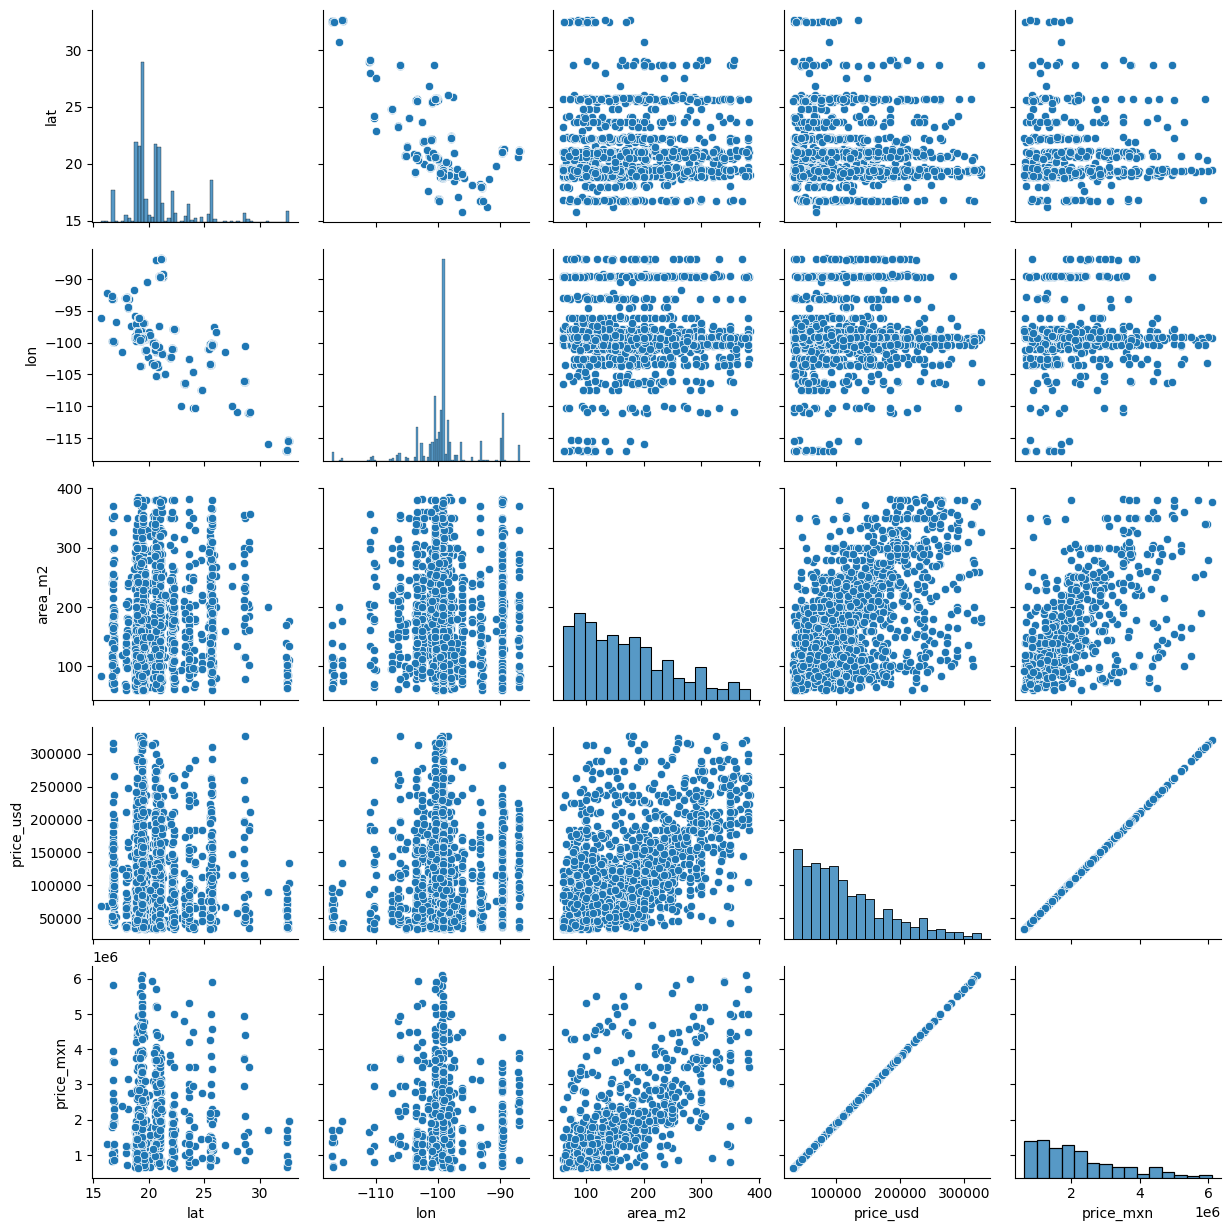

In [32]:
#pear plot
sns.pairplot(mexHouse_df)

<Axes: title={'center': 'area_m2'}, xlabel='property_type'>

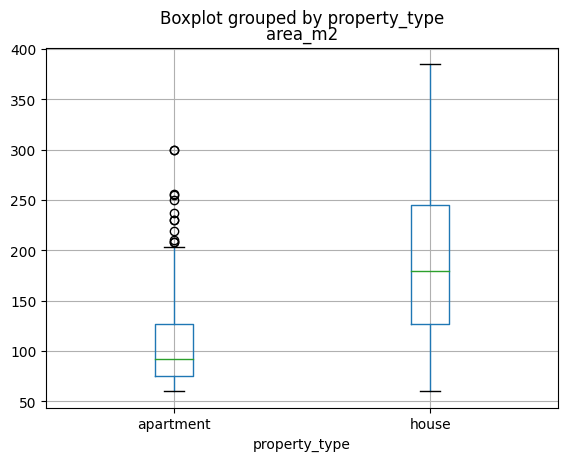

In [33]:
# box plots
mexHouse_df.boxplot(column="area_m2", by="property_type")

**Insights**

In summary, apartment sizes are more concentrated, but with a few larger-than-typical outliers, whereas houses cover a broader range of square meters with no significant outliers.

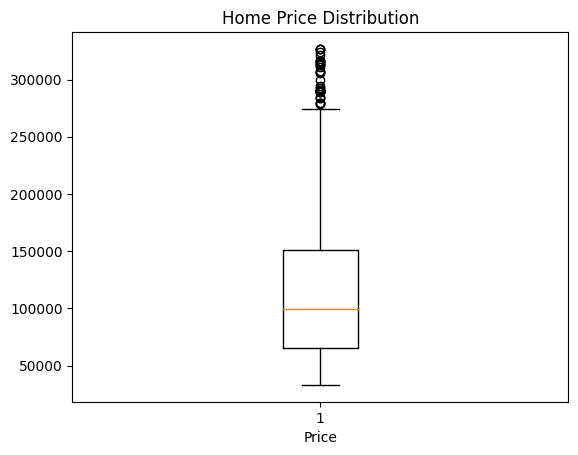

In [34]:
plt.boxplot(mexHouse_df["price_usd"]);
plt.xlabel("Price");
plt.title("Home Price Distribution");

The median (orange line) is slightly above 100,000, meaning half of the data points are above and half are below this value.

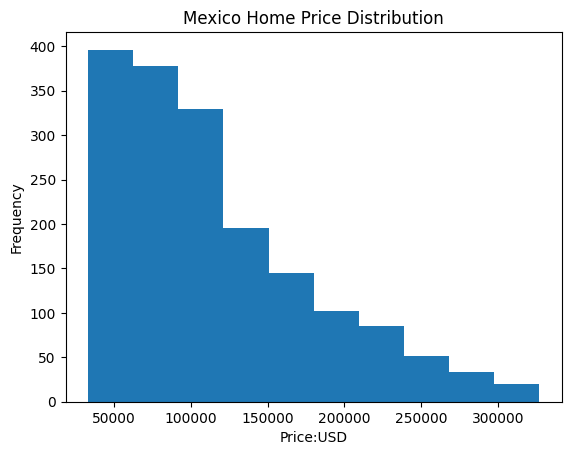

In [35]:
plt.hist(mexHouse_df["price_usd"])
plt.xlabel("Price:USD");
plt.ylabel("Frequency");
plt.title("Mexico Home Price Distribution");

**High Lights**

The price is centered to the left, around 50K-100K, and then declines. The data is right-skewed.

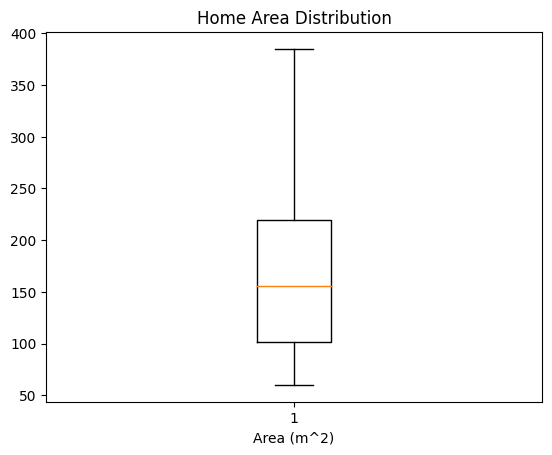

In [36]:
# box plot for area_m2
plt.boxplot(mexHouse_df["area_m2"]);
plt.xlabel("Area (m^2)");
plt.title("Home Area Distribution");

**High Lisghts**

The median area is around 150 square meters. Most of the square meter values fall between 100K and 250K, with a minimum of around 50K and a maximum of around 380K.

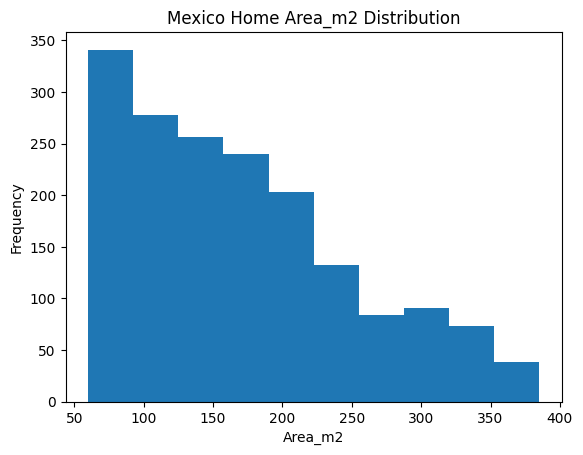

In [37]:
plt.hist(mexHouse_df["area_m2"])
plt.xlabel("Area_m2");
plt.ylabel("Frequency");
plt.title("Mexico Home Area_m2 Distribution");

**Insights**

The area in square meters is centered around 50-150 square meters. The data is right-skewed, meaning it is concentrated on the left and extends to the right, with a maximum around 380 square meters.

In [39]:

import plotly.express as px

# Assuming mexHouse_df is your DataFrame with the necessary columns
fig = px.scatter_mapbox(
    mexHouse_df,
    lat="lat",
    lon="lon",
    center={"lat": 19.4326, "lon": -99.1332},
    width=600,
    height=600,
    hover_data=["price_usd"],
    hover_name="property_type"
)

# Add mapbox style and enable zoom controls
fig.update_layout(
    mapbox_style="open-street-map",
    mapbox=dict(zoom=5)  # Set initial zoom level; adjust as needed
)

fig.show()


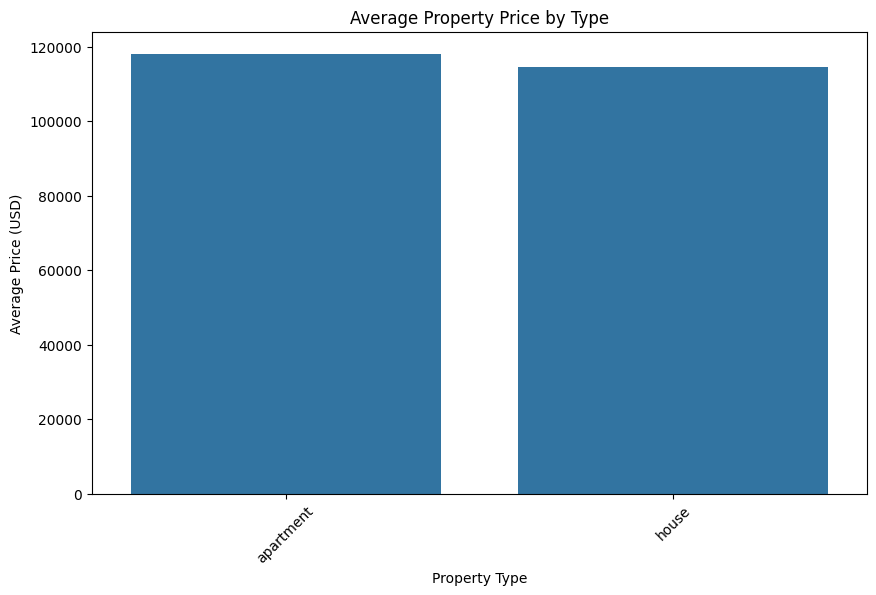

In [40]:
# prompt: bar chart for property type by price

# Group by property type and calculate the average price
property_type_avg_price = mexHouse_df.groupby('property_type')['price_usd'].mean()

# Create the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=property_type_avg_price.index, y=property_type_avg_price.values)

# Customize the chart
plt.xlabel('Property Type')
plt.ylabel('Average Price (USD)')
plt.title('Average Property Price by Type')
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [41]:
# get value count for state
mexHouse_df["state"].value_counts().head(20)

,count
state,
Distrito Federal,303
Estado de México,179
Yucatán,171
Morelos,160
Querétaro,128
Veracruz de Ignacio de la Llave,117
Puebla,95
Nuevo León,83
Jalisco,60


In [42]:
# describe area_m2 and price_usd
mexHouse_df[["area_m2","price_usd"]].describe()


,area_m2,price_usd
count,1736.000000,1736.000000
mean,170.261521,115331.980766
std,80.594539,65426.173873
min,60.000000,33157.890000
25%,101.750000,65789.470000
50%,156.000000,99262.130000
75%,220.000000,150846.665000
max,385.000000,326733.660000


**Which state has the most expensive real estate market**

Do housing prices vary by state? If so, which are the most expensive states for purchasing a home?

In [43]:
# group state by price
mean_statePrice = mexHouse_df.groupby("state")["price_usd"].mean().sort_values(ascending=False)
mean_statePrice

,price_usd
state,
Querétaro,133955.913281
Guanajuato,133277.965833
Nuevo León,129221.985663
Distrito Federal,128347.267426
Quintana Roo,128065.416053
Chihuahua,127073.852000
Jalisco,123386.472167
Estado de México,122723.490503
Campeche,121734.633333


In [44]:
mean_statePrice.shape

(30,)

<Axes: title={'center': 'Average Price by State'}, xlabel='State', ylabel='Average Price:USD'>

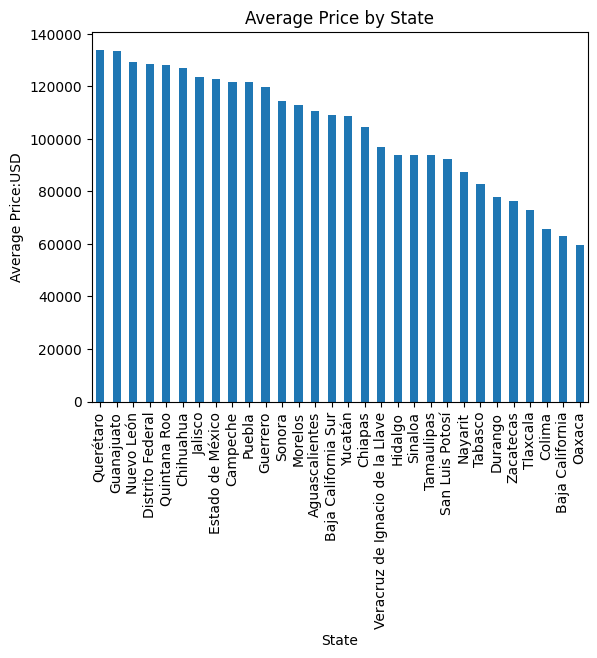

In [45]:
# create a bar chart from meanStatePrice
mean_statePrice.plot(
    kind="bar",
    xlabel="State",
    ylabel="Average Price:USD",
    title="Average Price by State"
)


**Insights**

The chart shows Querétaro as having one of the highest average property prices, but this may not accurately reflect its GDP ranking. While high demand and urbanization could explain the elevated prices, focusing solely on total prices can be misleading. By looking at the price per square meter instead, we may find that Querétaro’s prices are actually lower relative to property size, aligning more closely with its GDP. This approach gives a clearer picture of affordability and the real estate market, especially when comparing states with varying economies and property sizes.

In [51]:
# creating a new column for priceUSD per m2
mexHouse_df["priceUSD_per_m2"] = mexHouse_df["price_usd"] / mexHouse_df["area_m2"]

In [53]:
# drop price m2
mexHouse_df.drop(columns="price_per_m2", inplace=True)

In [54]:
mexHouse_df.head()

,property_type,state,lat,lon,area_m2,price_usd,priceUSD_per_m2
0,house,Estado de México,19.560181,-99.233528,150,67965.56,453.103733
1,house,Nuevo León,25.688436,-100.198807,186,63223.78,339.912796
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37,1028.028902
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80,628.725333
4,house,Yucatán,21.052583,-89.538639,205,105191.37,513.128634


In [55]:
# looking at state by priceUsd
mean_statePrice_m2 = mexHouse_df.groupby("state")["priceUSD_per_m2"].mean().sort_values(ascending=False)
mean_statePrice_m2

,priceUSD_per_m2
state,
Distrito Federal,1175.889150
Estado de México,763.753422
Guerrero,761.557206
Jalisco,743.568107
Quintana Roo,736.455284
Nuevo León,723.710040
Puebla,700.701974
Querétaro,687.227849
Oaxaca,683.019737


we can see the The chart shows Querétaro went from first to 8th spot on highest price sq meter which reflex more with the gdp of the time in mexico.

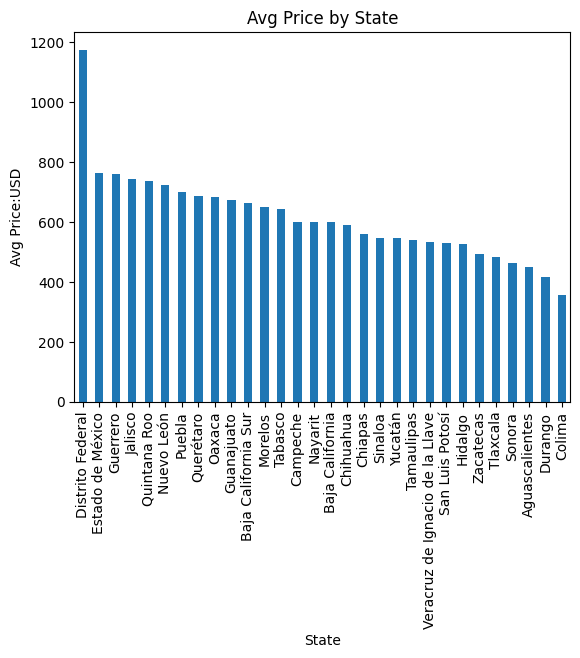

In [57]:
(
    mexHouse_df.groupby("state")
    ["priceUSD_per_m2"].mean()
    .sort_values(ascending=False)
    .plot(
        kind="bar",
        xlabel="State",
        ylabel="Avg Price:USD",
        title="Avg Price by State"
    )

);

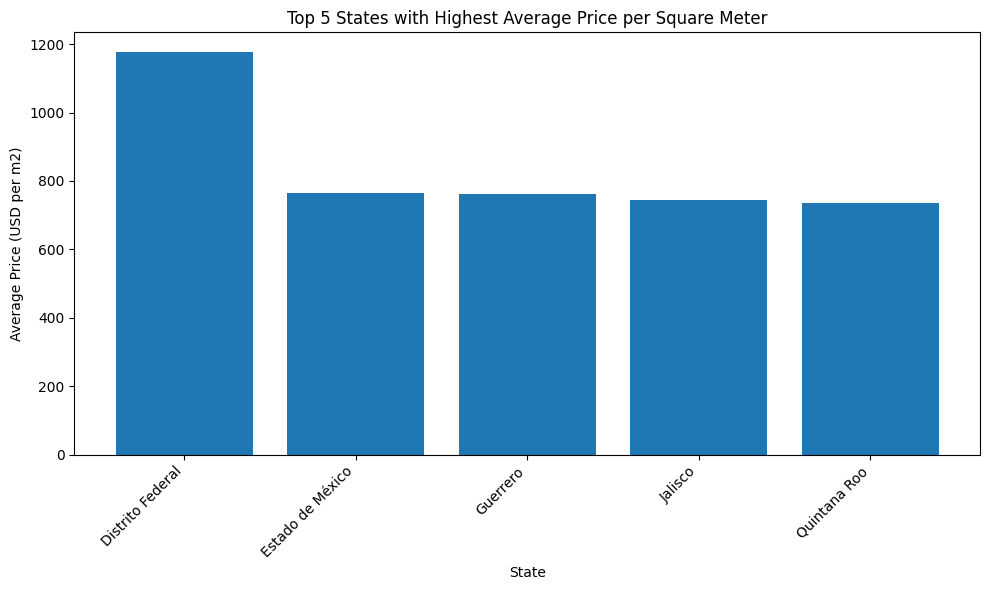

In [79]:
# chart the top 5  highest states by priceUSD_per_m2

top_5_states = mean_statePrice_m2.head(5)
plt.figure(figsize=(10, 6))
plt.bar(top_5_states.index, top_5_states.values)
plt.xlabel('State')
plt.ylabel('Average Price (USD per m2)')
plt.title('Top 5 States with Highest Average Price per Square Meter')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


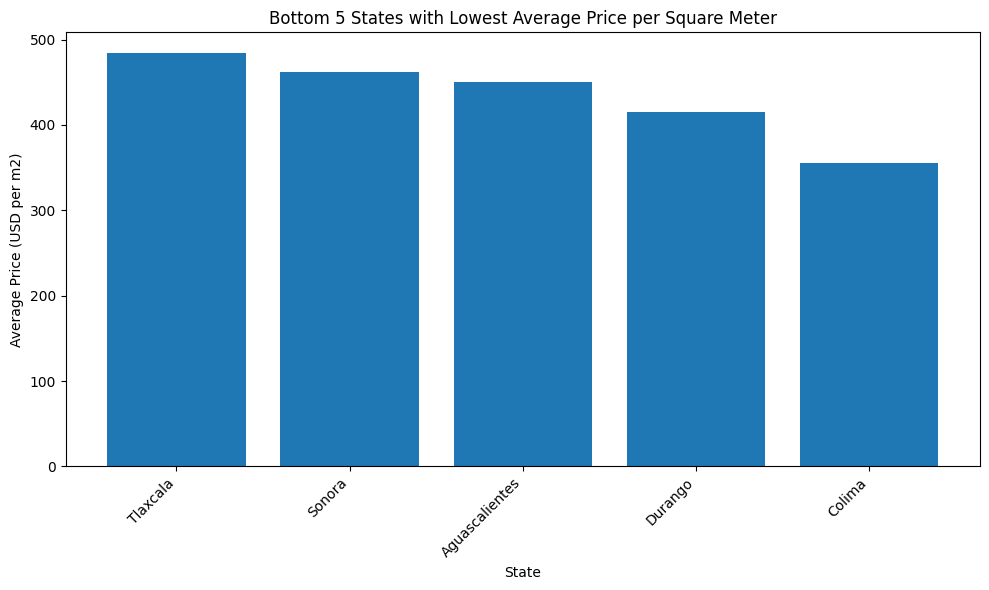

In [80]:
#  chart the bottom 5 states by priceUSD_per_m2

bottom_5_states = mean_statePrice_m2.tail(5)
plt.figure(figsize=(10, 6))
plt.bar(bottom_5_states.index, bottom_5_states.values)
plt.xlabel('State')
plt.ylabel('Average Price (USD per m2)')
plt.title('Bottom 5 States with Lowest Average Price per Square Meter')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Many of the top 10 state GDP are also in the top 10 most expesive real estate marking in Mexico. This chart is a more accurate reflection of the real estate market in Mexico at the time.

### looking at the relationship

Is there a relationship between price and sq meter. Does size influence price?

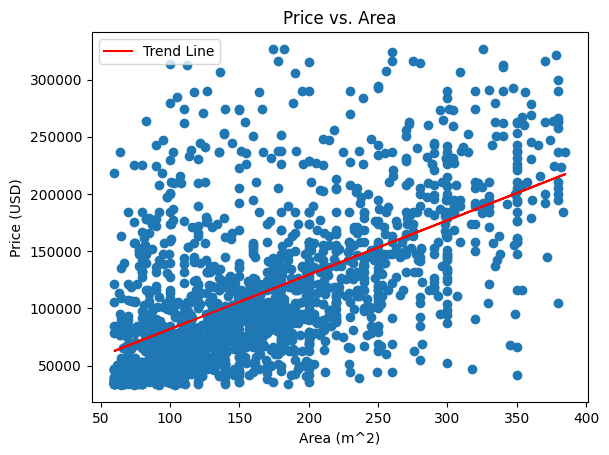

In [63]:
import numpy as np
import matplotlib.pyplot as plt

x = mexHouse_df["area_m2"]
y = mexHouse_df["price_usd"]

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel("Area (m^2)")
plt.ylabel("Price (USD)")
plt.title("Price vs. Area")

# Calculate the line of best fit (linear regression)
coefficients = np.polyfit(x, y, 1)  # 1 means linear fit
poly = np.poly1d(coefficients)

# Generate the trend line
trendline = poly(x)

# Plot the trend line in red
plt.plot(x, trendline, color="red", label="Trend Line")

# Display the plot with the trend line
plt.legend()
plt.show()


There is a lot of variation, as shown by the data points scattered away from the red line. However, we do see a general positive trend, which reflects that as the price increases, so does the area in square meters.

In [68]:
# calculate correlation of price and area m2
correlation = mexHouse_df["price_usd"].corr(mexHouse_df["area_m2"])
correlation

0.585518245323206

For price USD there is a modererate relationship between house size and price Mexico real estate market.

Does it matter not just for Mexico as a whole, but for the price and house size in individual states within Mexico?

In [69]:
# creating a datframe to see about  morelos
morelos_df = mexHouse_df[mexHouse_df["state"] == "Morelos"]

In [70]:
morelos_df.head()

,property_type,state,lat,lon,area_m2,price_usd,priceUSD_per_m2
6,house,Morelos,18.812605,-98.954826,281,151509.56,539.179929
9,house,Morelos,18.804197,-98.932816,117,63223.78,540.374188
18,house,Morelos,18.855343,-99.241142,73,36775.16,503.769315
49,house,Morelos,18.804197,-98.932816,130,65858.10,506.600769
55,house,Morelos,18.960244,-99.212962,305,227351.46,745.414623


Text(0.5, 1.0, 'Price vs. Area in Morelos')

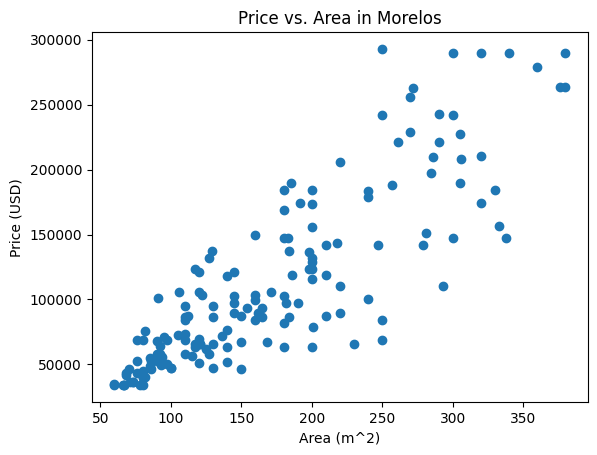

In [71]:
# create a scatter plot for price usd and area_m2
plt.scatter(morelos_df["area_m2"], y = morelos_df["price_usd"])
plt.xlabel("Area (m^2)")
plt.ylabel("Price (USD)")
plt.title("Price vs. Area in Morelos")

We can see for Morelos that th price is less scattered away from the center and shows a postive trend.  As price goes up area m2 also goes up. We can see a strong corrlecation with Morelos related to price and sq meter

In [72]:
morelosCorrelation = morelos_df["price_usd"].corr(morelos_df["area_m2"])
morelosCorrelation

0.8498077608713707

We can see a strong correlacation of around 85 percent

In [73]:
# looking at distrio federal which is one of the highest price states
distritoFederal_df = mexHouse_df[mexHouse_df["state"] == "Distrito Federal"]

In [74]:
distritoFederal_df.head()

,property_type,state,lat,lon,area_m2,price_usd,priceUSD_per_m2
14,apartment,Distrito Federal,19.390748,-99.158695,127,131716.20,1037.135433
16,house,Distrito Federal,19.337652,-99.223327,297,264390.77,890.204613
20,apartment,Distrito Federal,19.403334,-99.157755,129,131716.20,1021.055814
21,apartment,Distrito Federal,19.428152,-99.106194,68,67175.26,987.871471
26,apartment,Distrito Federal,19.430141,-99.172536,97,104846.10,1080.887629


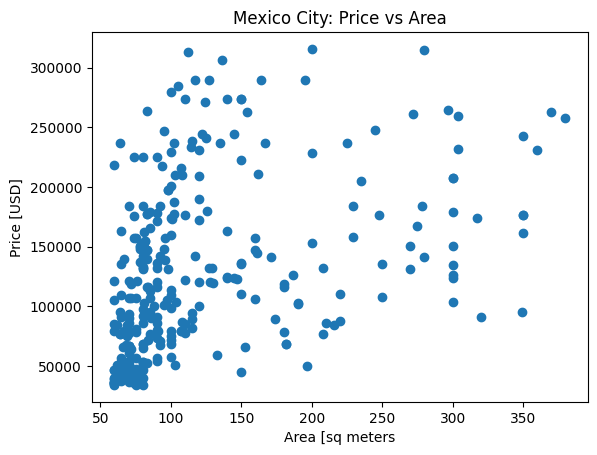

In [75]:
# create a scatter plot: price vs area
plt.scatter(x=distritoFederal_df["area_m2"], y=distritoFederal_df["price_usd"])
plt.xlabel("Area [sq meters")
plt.ylabel("Price [USD]")
plt.title("Mexico City: Price vs Area");

For Mexico city the data points are more scattered and show a weeker trend


In [76]:
# look at the corrlation
distritoFederalCorrelation = distritoFederal_df["price_usd"].corr(distritoFederal_df["area_m2"])
distritoFederalCorrelation

0.41070392130717864

we see a moderate trend on the weeker side.

When looking at individual states in Mexico, we notice that some have a stronger correlation between house area (in m²) and price, while other states show a weaker trend. Some areas might be more urban, with fewer larger houses and higher prices per m², while others could be more rural with larger homes. Overall, there is a correlation between house size and price, but depending on the region, this correlation can be either weak or strong.

In [83]:
mexHouse_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    1736 non-null   object 
 1   state            1736 non-null   object 
 2   lat              1736 non-null   float64
 3   lon              1736 non-null   float64
 4   area_m2          1736 non-null   int64  
 5   price_usd        1736 non-null   float64
 6   priceUSD_per_m2  1736 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 95.1+ KB


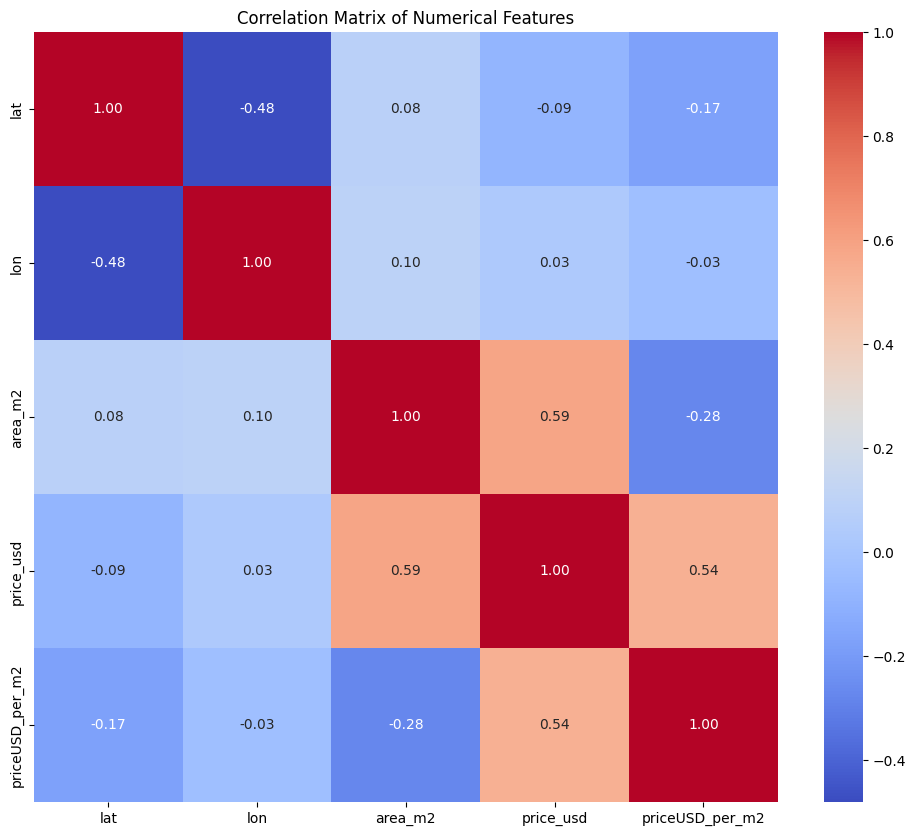

In [85]:
# prompt: make a correlation matrix for number columns with a chart

numeric_cols = mexHouse_df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


**Insights**

The correlation matrix highlights an inverse relationship between the price per square meter (priceUSD_per_m2) and the area in square meters (area_m2). Specifically, as the price per square meter decreases, the total area of the property tends to increase (as indicated by the -0.28 correlation value). This suggests that in many cases, larger properties are more affordable per unit area, possibly reflecting more rural or less densely populated regions where land is cheaper. Conversely, smaller properties tend to have higher prices per square meter, which could be typical of urban areas with limited space.

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [88]:
# Define the target variable
y = mexHouse_df['price_usd']

# Define the feature variables (excluding the target)
X = mexHouse_df.drop(columns=['price_usd'])

In [89]:
# List of categorical columns (assume 'property_type' is a categorical variable)
categorical_columns = ['property_type']

# List of numerical columns (other than the target)
numerical_columns = ['area_m2', 'lat', 'lon', 'priceUSD_per_m2']  # Adjust based on your dataset

In [90]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [91]:
# Define the preprocessor (handling scaling and one-hot encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)

# Create a pipeline with preprocessing and linear regression
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [92]:
# Train the model
model_pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['area_m2', 'lat', 'lon',
                                                   'priceUSD_per_m2']),
                                                 ('cat', OneHotEncoder(),
                                                  ['property_type'])])),
                ('regressor', LinearRegression())])

In [93]:
# Make predictions
y_pred = model_pipeline.predict(X_test)


In [98]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")





Mean Squared Error: 510001404.5315783
Root Mean Squared Error: 22583.210678102845
R² Score: 0.8886660951123653


**Insights**

- **Mean Squared Error (MSE)**: The average squared difference between predicted and actual values is around 510,001,404. While this number is large, it’s important to consider the scale of the target variable (property prices), and further domain knowledge is needed to assess if this is within an acceptable range.
- **Root Mean Squared Error (RMSE)**: The typical prediction error is around 22,583 USD. Depending on the price range of the properties in the dataset, this error might be reasonable, but for a high-priced dataset, it may still be slightly high. Further tuning or improving the model could help lower this.
- **R² Score**: The model explains about 88.87% of the variance in the target variable, which is generally considered a strong fit for a regression model. However, additional tuning could be done to reduce prediction error.